# Cleaning Data in Python

## Exploring your data

### Loading and viewing your data

In [98]:
# Import pandas
import pandas as pd

# Read the file into a DataFrame: df
df = pd.read_csv('dob_job_application_filings_subset.csv', low_memory=False)

# Print the head of df
print(df.head())

# Print the tail of df
print(df.tail())

# Print the shape of df
print(df.shape)

# Print the columns of df
print(df.columns)

       Job #  Doc #        Borough       House #  \
0  121577873      2      MANHATTAN  386            
1  520129502      1  STATEN ISLAND  107            
2  121601560      1      MANHATTAN  63             
3  121601203      1      MANHATTAN  48             
4  121601338      1      MANHATTAN  45             

                        Street Name  Block  Lot    Bin # Job Type Job Status  \
0  PARK AVENUE SOUTH                   857   38  1016890       A2          D   
1  KNOX PLACE                          342    1  5161350       A3          A   
2  WEST 131 STREET                    1729    9  1053831       A2          Q   
3  WEST 25TH STREET                    826   69  1015610       A2          D   
4  WEST 29 STREET                      831    7  1015754       A3          D   

            ...                         Owner's Last Name  \
0           ...            MIGLIORE                         
1           ...            BLUMENBERG                       
2           ...        

In [7]:
df_subset = df.loc[:,['Job #', 'Doc #', 'Borough', 'Initial Cost', 'Total Est. Fee',
       'Existing Zoning Sqft', 'Proposed Zoning Sqft',
       'Enlargement SQ Footage', 'Street Frontage', 'ExistingNo. of Stories',
       'Proposed No. of Stories', 'Existing Height', 'Proposed Height']]

In [8]:
# Print the head and tail of df_subset
print(df_subset.head())
print(df_subset.tail())

       Job #  Doc #        Borough Initial Cost Total Est. Fee  \
0  121577873      2      MANHATTAN    $75000.00        $986.00   
1  520129502      1  STATEN ISLAND        $0.00       $1144.00   
2  121601560      1      MANHATTAN    $30000.00        $522.50   
3  121601203      1      MANHATTAN     $1500.00        $225.00   
4  121601338      1      MANHATTAN    $19500.00        $389.50   

   Existing Zoning Sqft  Proposed Zoning Sqft  Enlargement SQ Footage  \
0                     0                     0                       0   
1                     0                     0                       0   
2                     0                     0                       0   
3                     0                     0                       0   
4                     0                     0                       0   

   Street Frontage  ExistingNo. of Stories  Proposed No. of Stories  \
0                0                       0                        0   
1              143    

In [9]:
df_subset.shape

(12846, 13)

### Further diagnosis

In [10]:
# Print the info of df
print(df.info())

# Print the info of df_subset
print(df_subset.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12846 entries, 0 to 12845
Data columns (total 82 columns):
Job #                           12846 non-null int64
Doc #                           12846 non-null int64
Borough                         12846 non-null object
House #                         12846 non-null object
Street Name                     12846 non-null object
Block                           12846 non-null int64
Lot                             12846 non-null int64
Bin #                           12846 non-null int64
Job Type                        12846 non-null object
Job Status                      12846 non-null object
Job Status Descrp               12846 non-null object
Latest Action Date              12846 non-null object
Building Type                   12846 non-null object
Community - Board               12846 non-null object
Cluster                         0 non-null float64
Landmarked                      2067 non-null object
Adult Estab                     1 no

### Frequency counts for categorical data

In [13]:
help(pd.value_counts)

Help on function value_counts in module pandas.core.algorithms:

value_counts(values, sort=True, ascending=False, normalize=False, bins=None, dropna=True)
    Compute a histogram of the counts of non-null values.
    
    Parameters
    ----------
    values : ndarray (1-d)
    sort : boolean, default True
        Sort by values
    ascending : boolean, default False
        Sort in ascending order
    normalize: boolean, default False
        If True then compute a relative histogram
    bins : integer, optional
        Rather than count values, group them into half-open bins,
        convenience for pd.cut, only works with numeric data
    dropna : boolean, default True
        Don't include counts of NaN
    
    Returns
    -------
    value_counts : Series



In [12]:
# Print the value counts for 'Borough'
print(df['Borough'].value_counts(dropna=False))

# Print the value_counts for 'State'
print(df['State'].value_counts(dropna=False))

# Print the value counts for 'Site Fill'
df['Site Fill'].value_counts(dropna=False)

MANHATTAN        6310
BROOKLYN         2866
QUEENS           2121
BRONX             974
STATEN ISLAND     575
Name: Borough, dtype: int64
NY    12391
NJ      241
PA       38
CA       20
OH       19
IL       17
FL       17
CT       16
TX       13
TN       10
DC        7
MD        7
GA        6
KS        6
MA        6
VA        5
CO        4
MN        3
SC        3
WI        3
AZ        3
UT        2
RI        2
NC        2
MI        1
NM        1
IN        1
VT        1
WA        1
Name: State, dtype: int64
NOT APPLICABLE                              7806
NaN                                         4205
ON-SITE                                      519
OFF-SITE                                     186
USE UNDER 300 CU.YD                          130
Name: Site Fill, dtype: int64


### Visualizing single variables with histograms

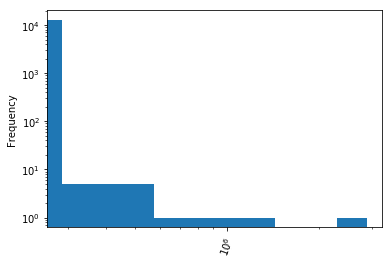

In [15]:
# Import matplotlib.pyplot
import matplotlib.pyplot as plt

# Plot the histogram
df['Existing Zoning Sqft'].plot(kind='hist', rot=70, logx=True, logy=True)

# Display the histogram
plt.show()

In [16]:
df['Existing Zoning Sqft'].describe()

count    1.284600e+04
mean     1.439973e+03
std      3.860757e+04
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      2.873107e+06
Name: Existing Zoning Sqft, dtype: float64

### Visualizing multiple variables with boxplots

In [18]:
df.columns

Index(['Job #', 'Doc #', 'Borough', 'House #', 'Street Name', 'Block', 'Lot',
       'Bin #', 'Job Type', 'Job Status', 'Job Status Descrp',
       'Latest Action Date', 'Building Type', 'Community - Board', 'Cluster',
       'Landmarked', 'Adult Estab', 'Loft Board', 'City Owned', 'Little e',
       'PC Filed', 'eFiling Filed', 'Plumbing', 'Mechanical', 'Boiler',
       'Fuel Burning', 'Fuel Storage', 'Standpipe', 'Sprinkler', 'Fire Alarm',
       'Equipment', 'Fire Suppression', 'Curb Cut', 'Other',
       'Other Description', 'Applicant's First Name', 'Applicant's Last Name',
       'Applicant Professional Title', 'Applicant License #',
       'Professional Cert', 'Pre- Filing Date', 'Paid', 'Fully Paid',
       'Assigned', 'Approved', 'Fully Permitted', 'Initial Cost',
       'Total Est. Fee', 'Fee Status', 'Existing Zoning Sqft',
       'Proposed Zoning Sqft', 'Horizontal Enlrgmt', 'Vertical Enlrgmt',
       'Enlargement SQ Footage', 'Street Frontage', 'ExistingNo. of Stories',
  

In [26]:
df['Initial Cost'].head()

0    $75000.00
1        $0.00
2    $30000.00
3     $1500.00
4    $19500.00
Name: Initial Cost, dtype: object

In [20]:
df['Initial Cost'].dtype

dtype('O')

In [100]:
df['Initial Cost'] = df['Initial Cost'].apply(lambda x : float(x[1:]))

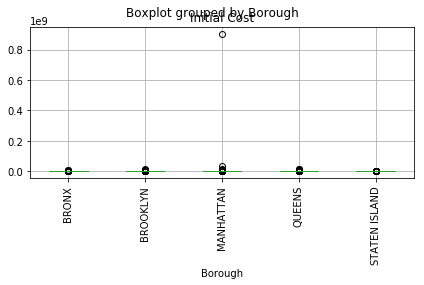

In [101]:
# Create the boxplot
df.boxplot(column='Initial Cost', by='Borough', rot=90)

# Display the plot
plt.tight_layout()
plt.show()

### Visualizing multiple variables with scatter plots

In [ ]:
# Import necessary modules
import pandas as pd
import matplotlib.pyplot as plt

# Create and display the first scatter plot
df.plot(kind='scatter', x='initial_cost', y='total_est_fee', rot=70, color='red')
plt.show()

# Create and display the second scatter plot
df_subset.plot(kind='scatter', x='initial_cost', y='total_est_fee', rot=70, color='green' )
plt.show()

## Tidying data for analysis

### Recognizing tidy data

For data to be tidy, it must have:

* Each variable as a separate column.
* Each row as a separate observation.

As a data scientist, you'll encounter data that is represented in a variety of different ways, so it is important to be able to recognize tidy (or untidy) data when you see it.

### Reshaping your data using melt

In [27]:
airquality = pd.read_csv('airquality.csv')
airquality.head()

,Ozone,Solar.R,Wind,Temp,Month,Day
0,41.0,190.0,7.4,67,5,1
1,36.0,118.0,8.0,72,5,2
2,12.0,149.0,12.6,74,5,3
3,18.0,313.0,11.5,62,5,4
4,NaN,NaN,14.3,56,5,5


In [28]:
# Melt airquality: airquality_melt
airquality_melt = pd.melt(airquality, id_vars=['Month', 'Day'])

# Print the head of airquality_melt
airquality_melt.head()

,Month,Day,variable,value
0,5,1,Ozone,41.0
1,5,2,Ozone,36.0
2,5,3,Ozone,12.0
3,5,4,Ozone,18.0
4,5,5,Ozone,NaN


### Customizing melted data

In [30]:
# Melt airquality: airquality_melt
airquality_melt = pd.melt(airquality, id_vars=['Month', 'Day'], var_name='measurement', value_name='reading')

# Print the head of airquality_melt
airquality_melt.head()

,Month,Day,measurement,reading
0,5,1,Ozone,41.0
1,5,2,Ozone,36.0
2,5,3,Ozone,12.0
3,5,4,Ozone,18.0
4,5,5,Ozone,NaN


### Pivot data


In [31]:
print(airquality_melt.head())

# Pivot airquality_melt: airquality_pivot
airquality_pivot = airquality_melt.pivot_table(index=['Month', 'Day'], columns='measurement', values='reading')

# Print the head of airquality_pivot
airquality_pivot.head()

   Month  Day measurement  reading
0      5    1       Ozone     41.0
1      5    2       Ozone     36.0
2      5    3       Ozone     12.0
3      5    4       Ozone     18.0
4      5    5       Ozone      NaN


measurement  Ozone  Solar.R  Temp  Wind
Month Day                              
5     1       41.0    190.0  67.0   7.4
      2       36.0    118.0  72.0   8.0
      3       12.0    149.0  74.0  12.6
      4       18.0    313.0  62.0  11.5
      5        NaN      NaN  56.0  14.3

### Resetting the index of a DataFrame

In [32]:
# Print the index of airquality_pivot
print(airquality_pivot.index)

# Reset the index of airquality_pivot: airquality_pivot_reset
airquality_pivot_reset = airquality_pivot.reset_index()

# Print the new index of airquality_pivot_reset
print(airquality_pivot_reset.index)

# Print the head of airquality_pivot_reset
airquality_pivot_reset.head()

MultiIndex(levels=[[5, 6, 7, 8, 9], [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31]],
           labels=[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4], [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 0, 1, 2, 3, 4, 5, 6, 7, 8, 

measurement,Month,Day,Ozone,Solar.R,Temp,Wind
0,5,1,41.0,190.0,67.0,7.4
1,5,2,36.0,118.0,72.0,8.0
2,5,3,12.0,149.0,74.0,12.6
3,5,4,18.0,313.0,62.0,11.5
4,5,5,NaN,NaN,56.0,14.3


### Pivoting duplicate values

In [33]:
airquality.shape

(153, 6)

In [38]:
import numpy as np

In [41]:
# Pivot airquality_dup: airquality_pivot
airquality_pivot = airquality_melt.pivot_table(index=['Month', 'Day'], columns='measurement', values='reading', aggfunc=np.mean)

# Reset the index of airquality_pivot
airquality_pivot = airquality_pivot.reset_index()

# Print the head of airquality_pivot
display(airquality_pivot.head())

# Print the head of airquality
airquality.head()

measurement,Month,Day,Ozone,Solar.R,Temp,Wind
0,5,1,41.0,190.0,67.0,7.4
1,5,2,36.0,118.0,72.0,8.0
2,5,3,12.0,149.0,74.0,12.6
3,5,4,18.0,313.0,62.0,11.5
4,5,5,NaN,NaN,56.0,14.3


,Ozone,Solar.R,Wind,Temp,Month,Day
0,41.0,190.0,7.4,67,5,1
1,36.0,118.0,8.0,72,5,2
2,12.0,149.0,12.6,74,5,3
3,18.0,313.0,11.5,62,5,4
4,NaN,NaN,14.3,56,5,5


### Splitting a column with .str

In [42]:
tb = pd.read_csv('tb.csv')
tb.head()

,country,year,m014,m1524,m2534,m3544,m4554,m5564,m65,mu,f014,f1524,f2534,f3544,f4554,f5564,f65,fu
0,AD,2000,0.0,0.0,1.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,AE,2000,2.0,4.0,4.0,6.0,5.0,12.0,10.0,NaN,3.0,16.0,1.0,3.0,0.0,0.0,4.0,NaN
2,AF,2000,52.0,228.0,183.0,149.0,129.0,94.0,80.0,NaN,93.0,414.0,565.0,339.0,205.0,99.0,36.0,NaN
3,AG,2000,0.0,0.0,0.0,0.0,0.0,0.0,1.0,NaN,1.0,1.0,1.0,0.0,0.0,0.0,0.0,NaN
4,AL,2000,2.0,19.0,21.0,14.0,24.0,19.0,16.0,NaN,3.0,11.0,10.0,8.0,8.0,5.0,11.0,NaN


In [43]:
# Melt tb: tb_melt
tb_melt = pd.melt(tb, id_vars=['country', 'year'])

# Create the 'gender' column
tb_melt['gender'] = tb_melt.variable.str[0]

# Create the 'age_group' column
tb_melt['age_group'] = tb_melt.variable.str[1:]

# Print the head of tb_melt
tb_melt.head()

,country,year,variable,value,gender,age_group
0,AD,2000,m014,0.0,m,014
1,AE,2000,m014,2.0,m,014
2,AF,2000,m014,52.0,m,014
3,AG,2000,m014,0.0,m,014
4,AL,2000,m014,2.0,m,014


### Splitting a column with `.split()` and `.get()`

In [45]:
ebola = pd.read_csv('ebola.csv')
ebola.head()

,Date,Day,Cases_Guinea,Cases_Liberia,Cases_SierraLeone,Cases_Nigeria,Cases_Senegal,Cases_UnitedStates,Cases_Spain,Cases_Mali,Deaths_Guinea,Deaths_Liberia,Deaths_SierraLeone,Deaths_Nigeria,Deaths_Senegal,Deaths_UnitedStates,Deaths_Spain,Deaths_Mali
0,1/5/2015,289,2776.0,NaN,10030.0,NaN,NaN,NaN,NaN,NaN,1786.0,NaN,2977.0,NaN,NaN,NaN,NaN,NaN
1,1/4/2015,288,2775.0,NaN,9780.0,NaN,NaN,NaN,NaN,NaN,1781.0,NaN,2943.0,NaN,NaN,NaN,NaN,NaN
2,1/3/2015,287,2769.0,8166.0,9722.0,NaN,NaN,NaN,NaN,NaN,1767.0,3496.0,2915.0,NaN,NaN,NaN,NaN,NaN
3,1/2/2015,286,NaN,8157.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3496.0,NaN,NaN,NaN,NaN,NaN,NaN
4,12/31/2014,284,2730.0,8115.0,9633.0,NaN,NaN,NaN,NaN,NaN,1739.0,3471.0,2827.0,NaN,NaN,NaN,NaN,NaN


In [46]:
# Melt ebola: ebola_melt
ebola_melt = pd.melt(ebola, id_vars=['Date', 'Day'], var_name='type_country', value_name='counts')

# Create the 'str_split' column
ebola_melt['str_split'] = ebola_melt.type_country.str.split('_')

# Create the 'type' column
ebola_melt['type'] = ebola_melt.str_split.str.get(0)

# Create the 'country' column
ebola_melt['country'] = ebola_melt.str_split.str.get(1)

# Print the head of ebola_melt
ebola_melt.head()

,Date,Day,type_country,counts,str_split,type,country
0,1/5/2015,289,Cases_Guinea,2776.0,"[Cases, Guinea]",Cases,Guinea
1,1/4/2015,288,Cases_Guinea,2775.0,"[Cases, Guinea]",Cases,Guinea
2,1/3/2015,287,Cases_Guinea,2769.0,"[Cases, Guinea]",Cases,Guinea
3,1/2/2015,286,Cases_Guinea,NaN,"[Cases, Guinea]",Cases,Guinea
4,12/31/2014,284,Cases_Guinea,2730.0,"[Cases, Guinea]",Cases,Guinea


## Combining data for analysis

### Combining rows of data

In [ ]:
# Concatenate uber1, uber2, and uber3: row_concat
row_concat = pd.concat([uber1, uber2, uber3])

# Print the shape of row_concat
print(row_concat.shape)

# Print the head of row_concat
row_concat.head()

### Combining columns of data

In [49]:
status_country = ebola_melt.loc[:, ['type', 'country']]
status_country.head()

,type,country
0,Cases,Guinea
1,Cases,Guinea
2,Cases,Guinea
3,Cases,Guinea
4,Cases,Guinea


In [50]:
ebola_melt = ebola_melt.loc[:, ['Date', 'Day', 'type_country', 'counts']]
ebola_melt.head()

,Date,Day,type_country,counts
0,1/5/2015,289,Cases_Guinea,2776.0
1,1/4/2015,288,Cases_Guinea,2775.0
2,1/3/2015,287,Cases_Guinea,2769.0
3,1/2/2015,286,Cases_Guinea,NaN
4,12/31/2014,284,Cases_Guinea,2730.0


In [51]:
# Concatenate ebola_melt and status_country column-wise: ebola_tidy
ebola_tidy = pd.concat([ebola_melt, status_country], axis=1)

# Print the shape of ebola_tidy
print(ebola_tidy.shape)

# Print the head of ebola_tidy
ebola_tidy.head()

(1952, 6)


,Date,Day,type_country,counts,type,country
0,1/5/2015,289,Cases_Guinea,2776.0,Cases,Guinea
1,1/4/2015,288,Cases_Guinea,2775.0,Cases,Guinea
2,1/3/2015,287,Cases_Guinea,2769.0,Cases,Guinea
3,1/2/2015,286,Cases_Guinea,NaN,Cases,Guinea
4,12/31/2014,284,Cases_Guinea,2730.0,Cases,Guinea


### Finding files that match a pattern

In [ ]:
# Import necessary modules
import glob
import pandas as pd

# Write the pattern: pattern
pattern = '*.csv'

# Save all file matches: csv_files
csv_files = glob.glob(pattern)

# Print the file names
print(csv_files)

# Load the second file into a DataFrame: csv2
csv2 = pd.read_csv(csv_files[1])

# Print the head of csv2
print(csv2.head())

### Iterating and concatenating all matches

In [ ]:
# Create an empty list: frames
frames = []

#  Iterate over csv_files
for csv in csv_files:

    #  Read csv into a DataFrame: df
    df = pd.read_csv(csv)
    
    # Append df to frames
    frames.append(df)

# Concatenate frames into a single DataFrame: uber
uber = pd.concat(frames)

# Print the shape of uber
print(uber.shape)

# Print the head of uber
print(uber.head())


### 1-to-1 data merge

In [57]:
site = pd.DataFrame([['DR-1', -49.85, -128.57],
                     ['DR-3', -47.15, -126.72],
                     ['MSK-4', -48.87, -123.4]], columns=['name', 'lat', 'long'])
site.head()

,name,lat,long
0,DR-1,-49.85,-128.57
1,DR-3,-47.15,-126.72
2,MSK-4,-48.87,-123.40


In [58]:
visited = pd.DataFrame([[619, 'DR-1', '1927-02-08'],
                        [734, 'DR-3', '1939-01-07'],
                        [837, 'MSK-4', '1932-01-14']], columns=['ident', 'site', 'dated'])
visited.head()

,ident,site,dated
0,619,DR-1,1927-02-08
1,734,DR-3,1939-01-07
2,837,MSK-4,1932-01-14


In [59]:
# Merge the DataFrames: o2o
o2o = pd.merge(left=site, right=visited, left_on='name', right_on='site')

# Print o2o
o2o.head()

,name,lat,long,ident,site,dated
0,DR-1,-49.85,-128.57,619,DR-1,1927-02-08
1,DR-3,-47.15,-126.72,734,DR-3,1939-01-07
2,MSK-4,-48.87,-123.40,837,MSK-4,1932-01-14


### Many-to-1 data merge

In [62]:
visited = pd.DataFrame([[619, 'DR-1', '1927-02-08'],
                       [622, 'DR-1', '1927-02-10'],
                       [734, 'DR-3', '1939-01-07'],
                       [735, 'DR-3', '1930-01-12'],
                       [751, 'DR-3', '1930-02-26'],
                       [752, 'DR-3', np.nan],
                       [837, 'MSK-4', '1932-01-14'],
                       [844, 'DR-1', '1932-03-22']], columns=['ident', 'site', 'dated'])
visited

,ident,site,dated
0,619,DR-1,1927-02-08
1,622,DR-1,1927-02-10
2,734,DR-3,1939-01-07
3,735,DR-3,1930-01-12
4,751,DR-3,1930-02-26
5,752,DR-3,NaN
6,837,MSK-4,1932-01-14
7,844,DR-1,1932-03-22


In [63]:
# Merge the DataFrames: m2o
m2o = pd.merge(left=site, right=visited, left_on='name', right_on='site')

# Print m2o
print(m2o)

    name    lat    long  ident   site       dated
0   DR-1 -49.85 -128.57    619   DR-1  1927-02-08
1   DR-1 -49.85 -128.57    622   DR-1  1927-02-10
2   DR-1 -49.85 -128.57    844   DR-1  1932-03-22
3   DR-3 -47.15 -126.72    734   DR-3  1939-01-07
4   DR-3 -47.15 -126.72    735   DR-3  1930-01-12
5   DR-3 -47.15 -126.72    751   DR-3  1930-02-26
6   DR-3 -47.15 -126.72    752   DR-3         NaN
7  MSK-4 -48.87 -123.40    837  MSK-4  1932-01-14


### Many-to-many data merge

In [ ]:
# Merge site and visited: m2m
m2m = pd.merge(left=site, right=visited, left_on='name', right_on='site')

# Merge m2m and survey: m2m
m2m = pd.merge(left=m2m, right=survey, left_on='ident', right_on='taken')

# Print the first 20 lines of m2m
print(m2m.head(20))

## Cleaning data for analysis

### Converting data types

In [65]:
tips = pd.read_csv('tips.csv')

In [67]:
tips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
total_bill    244 non-null float64
tip           244 non-null float64
sex           244 non-null category
smoker        244 non-null category
day           244 non-null object
time          244 non-null object
size          244 non-null int64
dtypes: category(2), float64(2), int64(1), object(2)
memory usage: 10.3+ KB


In [68]:
# Convert the sex column to type 'category'
tips.sex = tips.sex.astype('category')

# Convert the smoker column to type 'category'
tips.smoker = tips.smoker.astype('category')

# Print the info of tips
print(tips.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
total_bill    244 non-null float64
tip           244 non-null float64
sex           244 non-null category
smoker        244 non-null category
day           244 non-null object
time          244 non-null object
size          244 non-null int64
dtypes: category(2), float64(2), int64(1), object(2)
memory usage: 10.3+ KB
None


### Working with numeric data

In [69]:
# Convert 'total_bill' to a numeric dtype
tips['total_bill'] = pd.to_numeric(tips['total_bill'], errors='coerce')

# Convert 'tip' to a numeric dtype
tips['tip'] = pd.to_numeric(tips['tip'], errors='coerce')

# Print the info of tips
print(tips.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
total_bill    244 non-null float64
tip           244 non-null float64
sex           244 non-null category
smoker        244 non-null category
day           244 non-null object
time          244 non-null object
size          244 non-null int64
dtypes: category(2), float64(2), int64(1), object(2)
memory usage: 10.3+ KB
None


### String parsing with regular expressions

In [70]:
# Import the regular expression module
import re

# Compile the pattern: prog
prog = re.compile('\d{3}-\d{3}-\d{4}')

# See if the pattern matches
result = prog.match('123-456-7890')
print(bool(result))

# See if the pattern matches
result2 = prog.match('1123-456-7890')
print(bool(result2))


True
False


### Extracting numerical values from strings

In [71]:
# Find the numeric values: matches
matches = re.findall('\d+', 'the recipe calls for 10 strawberries and 1 banana')

# Print the matches
print(matches)


['10', '1']


### Pattern matching

In [72]:
# Write the first pattern
pattern1 = bool(re.match(pattern='\d{3}-\d{3}-\d{4}', string='123-456-7890'))
print(pattern1)

# Write the second pattern
pattern2 = bool(re.match(pattern='\$\d+\.\d+', string='$123.45'))
print(pattern2)

# Write the third pattern
pattern3 = bool(re.match(pattern='\w*', string='Australia'))
print(pattern3)

True
True
True


### Custom functions to clean data

In [73]:
# Define recode_sex()
def recode_sex(sex_value):

    # Return 1 if sex_value is 'Male'
    if sex_value == 'Male':
        return 1
    
    # Return 0 if sex_value is 'Female'    
    elif sex_value == 'Female':
        return 0
    
    # Return np.nan    
    else:
        return np.nan

# Apply the function to the sex column
tips['sex_recode'] = tips.sex.apply(recode_sex)

# Print the first five rows of tips
print(tips.head())

   total_bill   tip     sex smoker  day    time  size sex_recode
0       16.99  1.01  Female     No  Sun  Dinner     2          0
1       10.34  1.66    Male     No  Sun  Dinner     3          1
2       21.01  3.50    Male     No  Sun  Dinner     3          1
3       23.68  3.31    Male     No  Sun  Dinner     2          1
4       24.59  3.61  Female     No  Sun  Dinner     4          0


### Lambda functions

In [76]:
tips = pd.read_csv('tips.csv')

In [78]:
tips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
total_bill    244 non-null float64
tip           244 non-null float64
sex           244 non-null object
smoker        244 non-null object
day           244 non-null object
time          244 non-null object
size          244 non-null int64
dtypes: float64(2), int64(1), object(4)
memory usage: 13.4+ KB


In [83]:
tips['total_dollar'] = tips.total_bill.apply(lambda x : '${0}'.format((x)))

In [85]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size,total_dollar
0,16.99,1.01,Female,No,Sun,Dinner,2,$16.99
1,10.34,1.66,Male,No,Sun,Dinner,3,$10.34
2,21.01,3.50,Male,No,Sun,Dinner,3,$21.01
3,23.68,3.31,Male,No,Sun,Dinner,2,$23.68
4,24.59,3.61,Female,No,Sun,Dinner,4,$24.59


In [86]:
# Write the lambda function using replace
tips['total_dollar_replace'] = tips.total_dollar.apply(lambda x: x.replace('$', ''))

# Write the lambda function using regular expressions
tips['total_dollar_re'] = tips.total_dollar.apply(lambda x: re.findall('\d+\.\d+', x)[0])

# Print the head of tips
tips.head()

,total_bill,tip,sex,smoker,day,time,size,total_dollar,total_dollar_replace,total_dollar_re
0,16.99,1.01,Female,No,Sun,Dinner,2,$16.99,16.99,16.99
1,10.34,1.66,Male,No,Sun,Dinner,3,$10.34,10.34,10.34
2,21.01,3.50,Male,No,Sun,Dinner,3,$21.01,21.01,21.01
3,23.68,3.31,Male,No,Sun,Dinner,2,$23.68,23.68,23.68
4,24.59,3.61,Female,No,Sun,Dinner,4,$24.59,24.59,24.59


### Dropping duplicate data

In [ ]:
# Create the new DataFrame: tracks
tracks = billboard[['year', 'artist', 'track', 'time']]

# Print info of tracks
print(tracks.info())

# Drop the duplicates: tracks_no_duplicates
tracks_no_duplicates = tracks.drop_duplicates()

# Print info of tracks
tracks_no_duplicates.info()

### Filling missing data

In [87]:
# Calculate the mean of the Ozone column: oz_mean
oz_mean = np.mean(airquality.Ozone)

# Replace all the missing values in the Ozone column with the mean
airquality['Ozone'] = airquality.Ozone.fillna(oz_mean)

# Print the info of airquality
print(airquality.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 153 entries, 0 to 152
Data columns (total 6 columns):
Ozone      153 non-null float64
Solar.R    146 non-null float64
Wind       153 non-null float64
Temp       153 non-null int64
Month      153 non-null int64
Day        153 non-null int64
dtypes: float64(3), int64(3)
memory usage: 7.2 KB
None


### Testing your data with asserts

In [105]:
ebola_2 = ebola.drop_duplicates()

In [112]:
ebola_2.dropna(inplace=True)

In [114]:
ebola_2.isnull().sum()

Date                   0
Day                    0
Cases_Guinea           0
Cases_Liberia          0
Cases_SierraLeone      0
Cases_Nigeria          0
Cases_Senegal          0
Cases_UnitedStates     0
Cases_Spain            0
Cases_Mali             0
Deaths_Guinea          0
Deaths_Liberia         0
Deaths_SierraLeone     0
Deaths_Nigeria         0
Deaths_Senegal         0
Deaths_UnitedStates    0
Deaths_Spain           0
Deaths_Mali            0
dtype: int64

In [115]:
# Assert that there are no missing values
assert pd.notnull(ebola_2).all().all()

# Assert that all values are >= 0
assert (ebola_2 >= 0).all().all()

## Case study

In [137]:
g1800s = pd.read_csv('gapminder.csv', index_col=0)
g1800s.head()

,1800,1801,1802,1803,1804,1805,1806,1807,1808,1809,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,Life expectancy
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Abkhazia
1,28.21,28.20,28.19,28.18,28.17,28.16,28.15,28.14,28.13,28.12,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Afghanistan
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Akrotiri and Dhekelia
3,35.40,35.40,35.40,35.40,35.40,35.40,35.40,35.40,35.40,35.40,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Albania
4,28.82,28.82,28.82,28.82,28.82,28.82,28.82,28.82,28.82,28.82,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Algeria


In [138]:
g1800s.shape

(780, 218)

In [139]:
g1800s.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 780 entries, 0 to 259
Columns: 218 entries, 1800 to Life expectancy
dtypes: float64(217), object(1)
memory usage: 1.3+ MB


In [140]:
g1800s.columns

Index(['1800', '1801', '1802', '1803', '1804', '1805', '1806', '1807', '1808',
       '1809',
       ...
       '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016',
       'Life expectancy'],
      dtype='object', length=218)

In [141]:
g1800s.describe()

,1800,1801,1802,1803,1804,1805,1806,1807,1808,1809,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
count,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,...,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.00000,208.000000
mean,31.486020,31.448905,31.463483,31.377413,31.446318,31.562537,31.615970,31.573134,31.376766,31.310448,...,70.139712,70.447163,70.767740,70.969904,71.324375,71.663077,71.916106,72.088125,72.32101,72.556635
std,3.763585,3.755739,3.878204,3.901966,3.877156,3.947957,4.039261,3.917339,4.017228,3.972970,...,8.953255,8.800452,8.610341,8.898859,8.376540,8.217466,8.120852,8.074990,7.90202,7.738535
min,23.390000,23.390000,23.390000,19.600000,23.390000,23.390000,23.390000,23.390000,12.480000,13.430000,...,43.300000,44.500000,45.500000,32.200000,46.700000,46.100000,45.600000,45.400000,47.10000,48.860000
25%,29.000000,28.950000,28.900000,28.900000,28.950000,29.000000,29.000000,29.000000,28.950000,28.820000,...,64.825000,64.875000,65.225000,65.475000,65.600000,66.075000,66.475000,66.775000,67.05000,67.175000
50%,31.800000,31.700000,31.600000,31.500000,31.600000,31.700000,31.800000,31.800000,31.600000,31.500000,...,72.750000,73.000000,73.350000,73.700000,73.750000,74.050000,74.150000,74.300000,74.40000,74.500000
75%,33.900000,33.900000,33.900000,33.800000,33.870000,33.900000,34.000000,34.000000,33.870000,33.800000,...,76.925000,77.150000,77.425000,77.650000,77.825000,78.125000,78.300000,78.400000,78.50000,78.650000
max,42.850000,40.300000,44.370000,44.840000,42.830000,44.270000,45.820000,43.560000,43.550000,41.740000,...,84.500000,84.600000,84.600000,84.700000,84.700000,84.700000,84.800000,84.800000,84.80000,84.800000


### Visualizing your data

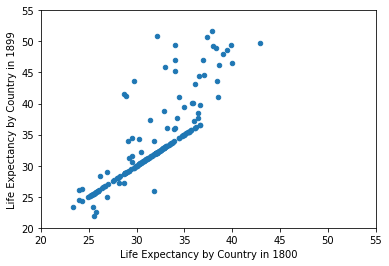

In [122]:
# Import matplotlib.pyplot
import matplotlib.pyplot as plt

# Create the scatter plot
g1800s.plot(kind='scatter', x='1800', y='1899')

# Specify axis labels
plt.xlabel('Life Expectancy by Country in 1800')
plt.ylabel('Life Expectancy by Country in 1899')

# Specify axis limits
plt.xlim(20, 55)
plt.ylim(20, 55)

# Display the plot
plt.show()

### Thinking about the question at hand

In [124]:
g1800s.columns

Index(['Unnamed: 0', '1800', '1801', '1802', '1803', '1804', '1805', '1806',
       '1807', '1808',
       ...
       '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016',
       'Life expectancy'],
      dtype='object', length=219)

In [ ]:
def check_null_or_valid(row_data):
    """Function that takes a row of data,
    drops all missing values,
    and checks if all remaining values are greater than or equal to 0
    """
    no_na = row_data.dropna()[1:-1]
    numeric = pd.to_numeric(no_na)
    ge0 = numeric >= 0
    return ge0

# Check whether the first column is 'Life expectancy'
assert g1800s.columns[-1] == 'Life expectancy'

# Check whether the values in the row are valid
assert g1800s.iloc[:, 1:].apply(check_null_or_valid, axis=1).all().all()

# Check that there is only one instance of each country
assert g1800s['Life expectancy'].value_counts()[0] == 1

### Assembling your data

In [ ]:
# Concatenate the DataFrames row-wise
gapminder = pd.concat([g1800s, g1900s, g2000s], axis=0)

# Print the shape of gapminder
print(gapminder.shape)

# Print the head of gapminder
print(gapminder.head())

### Reshaping your data

In [143]:
# Melt gapminder: gapminder_melt
gapminder_melt = pd.melt(g1800s, id_vars=['Life expectancy'])

# Rename the columns
gapminder_melt.columns = ['country', 'year', 'life_expectancy']

# Print the head of gapminder_melt
print(gapminder_melt)

                         country  year  life_expectancy
0                       Abkhazia  1800              NaN
1                    Afghanistan  1800            28.21
2          Akrotiri and Dhekelia  1800              NaN
3                        Albania  1800            35.40
4                        Algeria  1800            28.82
5                 American Samoa  1800              NaN
6                        Andorra  1800              NaN
7                         Angola  1800            26.98
8                       Anguilla  1800              NaN
9            Antigua and Barbuda  1800            33.54
10                     Argentina  1800            33.20
11                       Armenia  1800            34.00
12                         Aruba  1800            34.42
13                     Australia  1800            34.05
14                       Austria  1800            34.40
15                    Azerbaijan  1800            29.17
16                       Bahamas  1800          

### Checking the data types

In [145]:
# Convert the year column to numeric
gapminder_melt.year = pd.to_numeric(gapminder_melt.year)

# Test if country is of type object
assert gapminder_melt.country.dtypes == np.object

# Test if year is of type int64
assert gapminder_melt.year.dtypes == np.int64

# Test if life_expectancy is of type float64
assert gapminder_melt.life_expectancy.dtypes == np.float64

### Looking at country spellings

In [147]:
gapminder = gapminder_melt.copy()

In [148]:
# Create the series of countries: countries
countries = gapminder['country']

# Drop all the duplicates from countries
countries = countries.drop_duplicates()

# Write the regular expression: pattern
pattern = '^[A-Za-z]*$'

# Create the Boolean vector: mask
mask = countries.str.contains('^[A-Za-z\.\s]*$')

# Invert the mask: mask_inverse
mask_inverse = ~mask

# Subset countries using mask_inverse: invalid_countries
invalid_countries = countries.loc[mask_inverse]

# Print invalid_countries
print(invalid_countries)

49            Congo, Dem. Rep.
50                 Congo, Rep.
53               Cote d'Ivoire
73      Falkland Is (Malvinas)
93               Guinea-Bissau
98            Hong Kong, China
118    United Korea (former)\n
131               Macao, China
132             Macedonia, FYR
145      Micronesia, Fed. Sts.
161            Ngorno-Karabakh
187             St. Barthélemy
193     St.-Pierre-et-Miquelon
225                Timor-Leste
251      Virgin Islands (U.S.)
252       North Yemen (former)
253       South Yemen (former)
258                      Åland
Name: country, dtype: object


In [149]:
mask

0       True
1       True
2       True
3       True
4       True
5       True
6       True
7       True
8       True
9       True
10      True
11      True
12      True
13      True
14      True
15      True
16      True
17      True
18      True
19      True
20      True
21      True
22      True
23      True
24      True
25      True
26      True
27      True
28      True
29      True
       ...  
230     True
231     True
232     True
233     True
234     True
235     True
236     True
237     True
238     True
239     True
240     True
241     True
242     True
243     True
244     True
245     True
246     True
247     True
248     True
249     True
250     True
251    False
252    False
253    False
254     True
255     True
256     True
257     True
258    False
259     True
Name: country, Length: 260, dtype: bool

In [150]:
~mask

0      False
1      False
2      False
3      False
4      False
5      False
6      False
7      False
8      False
9      False
10     False
11     False
12     False
13     False
14     False
15     False
16     False
17     False
18     False
19     False
20     False
21     False
22     False
23     False
24     False
25     False
26     False
27     False
28     False
29     False
       ...  
230    False
231    False
232    False
233    False
234    False
235    False
236    False
237    False
238    False
239    False
240    False
241    False
242    False
243    False
244    False
245    False
246    False
247    False
248    False
249    False
250    False
251     True
252     True
253     True
254    False
255    False
256    False
257    False
258     True
259    False
Name: country, Length: 260, dtype: bool

### More data cleaning and processing

In [151]:
# Assert that country does not contain any missing values
assert pd.notnull(gapminder.country).all()

# Assert that year does not contain any missing values
assert pd.notnull(gapminder.year).all()

# Drop the missing values
gapminder = gapminder.dropna()

# Print the shape of gapminder
print(gapminder.shape)


(43857, 3)


### Wrapping up

year
1800    31.486020
1801    31.448905
1802    31.463483
1803    31.377413
1804    31.446318
Name: life_expectancy, dtype: float64
year
2012    71.663077
2013    71.916106
2014    72.088125
2015    72.321010
2016    72.556635
Name: life_expectancy, dtype: float64


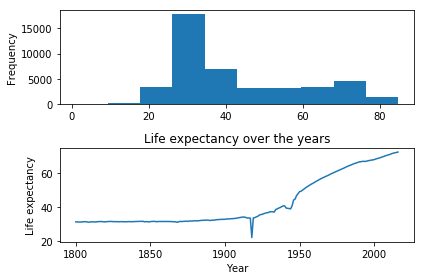

In [152]:
# Add first subplot
plt.subplot(2, 1, 1) 

# Create a histogram of life_expectancy
gapminder.life_expectancy.plot(kind='hist')

# Group gapminder: gapminder_agg
gapminder_agg = gapminder.groupby('year')['life_expectancy'].mean()

# Print the head of gapminder_agg
print(gapminder_agg.head())

# Print the tail of gapminder_agg
print(gapminder_agg.tail())

# Add second subplot
plt.subplot(2, 1, 2)

# Create a line plot of life expectancy per year
gapminder_agg.plot()

# Add title and specify axis labels
plt.title('Life expectancy over the years')
plt.ylabel('Life expectancy')
plt.xlabel('Year')

# Display the plots
plt.tight_layout()
plt.show()

# Save both DataFrames to csv files
gapminder_agg.to_csv('gapminder_agg.csv')
gapminder.to_csv('gapminder.csv')

In [154]:
gapminder_agg.head()

year
1800    31.486020
1801    31.448905
1802    31.463483
1803    31.377413
1804    31.446318
Name: life_expectancy, dtype: float64